# Übung 4: Trapezflügel

In [16]:
# Importieren von Python-Biblioteken
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import IntSlider, FloatSlider, fixed, VBox, HBox, Label
import ipywidgets as widgets

# Erhöhen der Plot-Auflösung
plt.rcParams["figure.dpi"] = 140

### 4.1.1 Visualisierung: Trapezflügel

In [17]:
def trapezfluegel(l_a, AR, l_i=1.0) -> np.array:
    """Generiert die Planform eines Trapezflügels auf Basis der gegebenen Flügeltiefen und Streckung"""

    # Berechnung der Halbspannweite
    b = (l_a + l_i) * AR / 2
    s = b / 2

    # Definition aller Eckpunkte
    points = np.array([
        [0, 0], [s, -l_a/2 + l_i/2], [s, l_a/2 + l_i/2], [0, l_i], 
        [-s, l_a/2 + l_i/2], [-s, -l_a/2  + l_i/2], [0, 0]])
    
    return points


def plot_trapezfluegel(l_a, AR):
    """Plottet die Planform eines Trapezflügels auf Basis der gegebenen Flügeltiefen und Streckung"""
    
    # Flügeleckpunkte generieren
    points = trapezfluegel(l_a, AR)

    # Geometrie plotten
    plt.figure(figsize=(7, 3))
    plt.plot(points[:,0], points[:, 1], '-', color="black")
    plt.vlines(0, 0, 1, "black", "--")
    plt.xlabel('Spannweite [m]')
    plt.ylabel('Flügeltiefe [m]')
    plt.title('Trapezflügel')
    plt.gca().invert_yaxis()
    plt.axis('equal')
    plt.show()


def widget_trapezfluegel():
    """Erzeugt ein widget, mit dem sich die Planform eines Trapezflügels interaktiv visualisieren lässt"""

    slider_l_a = VBox([Label('Flügeltiefe außen'), FloatSlider(value=0.5, min=0, max=1.0, step=0.1)])
    slider_AR = VBox([Label('Streckung'), FloatSlider(value=10, min=5, max=20, step=1)])

    # Interaktiver plot
    ui = VBox([slider_l_a, slider_AR])
    ui = VBox([ui], layout=widgets.Layout(justify_content='center'))
    out = widgets.interactive_output(plot_trapezfluegel, {'l_a': slider_l_a.children[1], 'AR': slider_AR.children[1]})

    return HBox([out, ui])

In [18]:
display(widget_trapezfluegel())

### 4.1.2 Geometrische Parameter und Randbedinungen

In [19]:
# Konstant
alpha = 5                       # Anstellwinel [deg]
alpha = np.deg2rad(alpha)       # Anstellwinel [rad]  
U_inf = 10.0                    # Anströmgeschwindigkeit [m/s]
rho = 1.225                     # Dichte [kg/m^3]
l_i = 1.0                       # Flügeltiefe Wurzel [m]

# 🟠

In [20]:
# Diese Parameter können verändert werden
l_a = 0.5                       # Flügeltiefe außen [m]
AR = 10                         # Streckung/ Aspect Ratio

#### Berechnung weiterer geometrischer Parameter

In [21]:
# Berechnung der Halbspannweite
b = (l_i + l_a) * AR / 2
s = b / 2 

# Berechnung der Flügelfläche aus Halbspannweite und Flügeltiefen
S = b/2 * (l_a + l_i)       

print("Spannweite:                  ", "%.2f" % b, "m")
print("Halbspannweite:              ", "%.2f" % s, "m")
print("Flügelfläche:                ", "%.2f" % S, "m^2")

Spannweite:                   7.50 m
Halbspannweite:               3.75 m
Flügelfläche:                 5.62 m^2


### 4.1.3 Visualisierung der Diskretisierung

In [22]:
def tiefe_trapez(y, l_a, s) -> float:
    """Berechnet mit gegebenen Geometriepartametern eines Trapezflügels die lokale Flügeltiefe für eine spannweitige Position"""
    return 1 + (l_a - 1) * (abs(y) / s)
    

def plot_diskretisierung_trapez(l_a, AR, s, N):
    """Plottet die Diskretisierung eines Trapezflügels auf Basis der Anzahl der Elementarflügel"""
    points = trapezfluegel(l_a, AR)
    
    # Diskretisierung der Halbspannweite
    y_values = np.linspace(-s, s, N+1)
    chord_values = [tiefe_trapez(y, l_a, s) for y in y_values]
    
    # Geometrie plotten
    plt.figure(figsize=(6, 3))
    plt.plot(points[:,0], points[:, 1], '-', color="black")

    # Elementarflügel plotten
    for i in range(N):
        plt.plot([y_values[i], y_values[i]], [-chord_values[i]/2 + l_i/2, chord_values[i]/2 + l_i/2], 'g-')
    
    plt.vlines(0, 0, 1, "black", "--")
    plt.xlabel('Spannweite [m]')
    plt.ylabel('Flügeltiefe [m]')
    plt.title('Diskretisierung Trapezflügel')
    plt.axis('equal')
    plt.gca().invert_yaxis()
    plt.show()


def widget_diskretisierung_trapez(l_a, AR, s):
    """Erzeugt ein widget, mit dem sich die Diskretisierung eines Trapezflügels interaktiv visualisieren lässt"""

    slider_N = VBox([Label('Anzahl der Elementarflügel'), IntSlider(value=30, min=1, max=100, step=1)])

    # Interaktiver plot
    ui = VBox([slider_N])
    ui = VBox([ui], layout=widgets.Layout(justify_content='center'))
    out = widgets.interactive_output(plot_diskretisierung_trapez, {'l_a': fixed(l_a), 'AR': fixed(AR), "s": fixed(s), 'N': slider_N.children[1]})
    return HBox([out, ui])

In [23]:
display(widget_diskretisierung_trapez(l_a, AR, s))

### 4.1.4 Berechnung der Hufeisenwirbel-Koordinaten
Zur Bestimmung der $N$ (Variable n) unbekannten Wirbelstärken $\Gamma$ wird die kinematische Strömungsbedingung in den $N$ (Variable $m$) Aufpunkten erfüllt, und man hat ein lineares Gleichungssystem zu lösen. Dafür werden die Koordinaten des tragenden Wirbels entlang der örtlichen $l_p/4$-Linie (indizes a, b) am Rand jedes Elementarflügels sowie die der Aufpunkte im $3l_p/4$–Punkt des Mittelschnittes jedes Elementarflügels (index c) bestimmt. Der Koordinatenursprung (x, y) = (0, 0) liegt hierbei dort, wo sich die Symmetrieachse des Flügels (Rumpf) und die Vorderkante.

#### 🟠

In [24]:
# Diese Parameter können verändert werden
N = 500                             # Anzahl der Elementarflügel

In [25]:
# Breite eines Elementarflügels
delta_b = b/N    

def x_position(y, l_i, l_a, s, aufpunkt=False):
    """Berechnet die Tiefenposition der Punkte A und B und des Aufpunkts C"""

    tiefe = 0.75 if aufpunkt else 0.25
    return abs(y) / s * (l_i - l_a) / 2 + tiefe * (l_i - abs(y) / s * (l_i - l_a))


def compute_coords(s, N, delta_b, l_i, l_a):
    """Berechnet die Hufeisenwirbel-Koordinaten aus Basis der Flügelgeometrie und Anzahl der Elementarflügel"""

    # Spannweitige Positionen der Punkte A, B und Aufpunkt C
    y_a = np.array([-s +  j    * delta_b for j in range(N)])
    y_b = np.array([-s + (j+1) * delta_b for j in range(N)])
    y_c = np.array([-s + delta_b/2 + i*delta_b for i in range(N)])
    
    # Tiefenposition der Punkte A und B und des Aufpunkts C
    x_a = np.array([x_position(y_i, l_i, l_a, s) for y_i in y_a])
    x_b = np.array([x_position(y_i, l_i, l_a, s) for y_i in y_b])
    x_c = np.array([x_position(y_i, l_i, l_a, s, True) for y_i in y_c])

    # Spannweitige Positionen der bis ins Unendliche reichenden nichttragenden Wirbel
    y_aoo = np.array([-s +  j    * delta_b for j in range(N)])
    y_boo = np.array([-s + (j+1) * delta_b for j in range(N)])

    # Tiefenposition der bis ins Unendliche reichenden nichttragenden Wirbel
    x_aoo = x_a + 100*s
    x_boo = x_b + 100*s

    return y_a, y_b, y_c, x_a, x_b, x_c, y_aoo, y_boo, x_aoo, x_boo


# Berechnen aller Hufeisenwirbel-Koordinaten
y_a, y_b, y_c, x_a, x_b, x_c, y_aoo, y_boo, x_aoo, x_boo = compute_coords(s, N, delta_b, l_i, l_a)

### 4.1.5 Berechnung der Koeffizientenmatrix

Die Koeffizientenmatrix `a` ist die Summe der gebundenen und freien Wirbel.
Die Koeffizientenmatrix der induzierenden Wirbel `a_ind` ist die Summe der freien Wirbel.
Die Wirbelstärken `Gamma` werden aus Inverser der Koeffizientenmatrix, Anstellwinkelvektor und Anströmgeschwindigkeit berechnet.

In [26]:
def compute_coeff_matrices(y_a, y_b, y_c, x_a, x_b, x_c):
    """Berechnet die drei Anteile der Koeffizientenmatrix"""
    
    # Initialisieren der Matrizen
    a_AB = np.zeros((x_a.size, x_a.size))
    a_Aoo = np.zeros((x_a.size, x_a.size))
    a_Boo = np.zeros((x_a.size, x_a.size))

    # Berechnen der Anteile der gebundenen Wirbel
    for j in range(N):
        for i in range(N):
            a_AB[i, j] = 1 / (4*np.pi) * (1/((x_c[i] - x_a[j])*(y_c[i] - y_b[j]) - (y_c[i] - y_a[j])*(x_c[i] - x_b[j]))) * (((x_b[j] - x_a[j])*(x_c[i] - x_a[j]) + (y_b[j] - y_a[j])*(y_c[i] - y_a[j]))/ np.sqrt((x_c[i] - x_a[j])**2 + (y_c[i] - y_a[j])**2) - ((x_b[j] - x_a[j])*(x_c[i] - x_b[j]) + (y_b[j] - y_a[j])*(y_c[i] - y_b[j]))/ np.sqrt((x_c[i] - x_b[j])**2 + (y_c[i] - y_b[j])**2))

    # Berechnen der Anteile der freien Wirbel der linken Seite
    for j in range(N):
        for i in range(N):
            a_Aoo[i, j] = 1 / (4*np.pi) * 1/(y_a[j] - y_c[i]) * ((x_c[i] - x_a[j])/ (np.sqrt((x_c[i] - x_a[j])**2 + (y_c[i] - y_a[j])**2)) + 1)

    # Berechnen der Anteile der freien Wirbel der rechten Seite
    for j in range(N):
        for i in range(N):
            a_Boo[i, j] = 1 / (4*np.pi) * 1/(y_b[j] - y_c[i]) * ((x_c[i] - x_b[j])/ (np.sqrt((x_c[i] - x_b[j])**2 + (y_c[i] - y_b[j])**2)) + 1)
    
    return a_AB, a_Aoo, a_Boo

In [27]:
# Berechnen der Anteile der Koeffizientenmatrix
a_AB, a_Aoo, a_Boo = compute_coeff_matrices(y_a, y_b, y_c, x_a, x_b, x_c)

a = a_AB + a_Aoo - a_Boo                # Koeffizientenmatrix
a_ind = a_Aoo - a_Boo                   # Koeffizientenmatrix der induzierenden Wirbel
alpha_g = np.full((a.shape[0]), alpha)    # Anstellwinkelvektor

# Löst das lineare Gleichungssystem Ax = b, wobei
# A - Koeffizientenmatrix a
# x - Zirkulationsvektor Gamma
# B - Koeffizientenvektor alpha_g * (- U_inf)
Gamma = np.linalg.solve(a, alpha_g * (- U_inf)) 

### 4.1.6 Berechnung von Kräften und Beiwerten
#### Auftrieb und Widerstand

In [28]:
# Berechnung des Auftriebs nach Kutta-Joukowsky
A_j = rho * delta_b * U_inf * Gamma
A = np.sum(A_j)

# Berechnung des induzierten Widerstands
w_m = a_ind @ Gamma
W_ind = np.sum(-rho *w_m @ Gamma * delta_b)

print("Auftrieb:                    ", "%.2f" % A, "N")
print("Induzierter Widerstand:      ", "%.2f" % W_ind, "N")

Auftrieb:                     149.62 N
Induzierter Widerstand:       2.81 N


#### Auftriebsverteilung

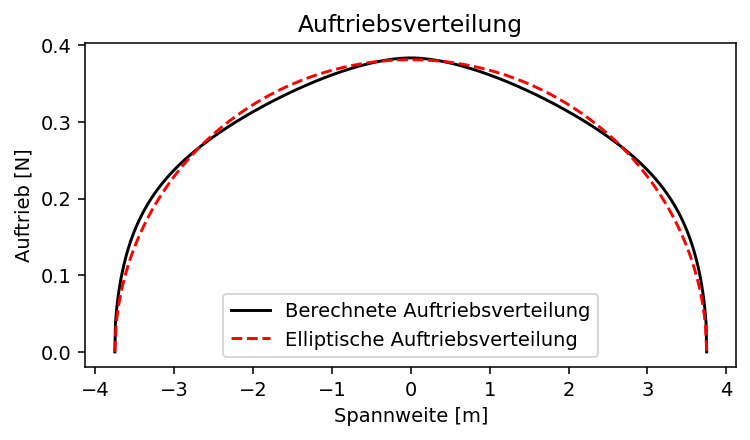

In [29]:
# Hinzufügen von Endpunkten zum plotten
A_j = np.insert(A_j, 0, 0)
A_j = np.append(A_j, 0)
y_c = np.insert(y_c, 0, -s)
y_c = np.append(y_c, s)

# Berechnen der Fläche unter der berechneten Auftriebsverteilung
area_distr = np.trapezoid(A_j, y_c)

# Erzeugen einer elliptischen Auftriebsverteilung
y_elliptisch = np.linspace(-s, s, len(y_c))
A_elliptisch_raw = np.sqrt(1 - (y_elliptisch / s) ** 2)

# Skalieren der elliptischen Verteilung, sodass die resultierende Auftriebskraft identisch ist
area_elliptisch_raw = np.trapezoid(A_elliptisch_raw, y_elliptisch)
scale_factor = area_distr / area_elliptisch_raw
A_elliptisch = A_elliptisch_raw * scale_factor

# Plotten der Auftriebsverteilungen
plt.figure(figsize=(6, 3))
plt.plot(y_c, A_j, '-', color="black", label='Berechnete Auftriebsverteilung')
plt.plot(y_elliptisch, A_elliptisch, '--', color="red", label='Elliptische Auftriebsverteilung')
plt.xlabel('Spannweite [m]')
plt.ylabel('Auftrieb [N]')
plt.title('Auftriebsverteilung')
plt.legend()
plt.show()

#### Aerodynamische Beiwerte und Oswald-Faktor

In [30]:
# Auftriebsbeiwert
C_A = 2*A / rho / U_inf**2 / S

# Widerstandsbeiwert (induziert)
C_W_ind = 2*W_ind / rho / U_inf**2 / S

# Induzierter Widerstand der elliptischen Zirkulationsverteilung
C_W_ind_ell = C_A**2 / AR / np.pi

# Oswald Faktor
Oswald = C_W_ind_ell / C_W_ind

print("Auftriebsbeiwert:                ", "%.5f" % C_A)
print("Widerstandsbeiwert:              ", "%.5f" % C_W_ind)
print("Widerstandsbeiwert (Ellipse):    ", "%.5f" % C_W_ind_ell)
print("Oswald-Faktor:                   ", "%.3f" % Oswald)

Auftriebsbeiwert:                 0.43428
Widerstandsbeiwert:               0.00814
Widerstandsbeiwert (Ellipse):     0.00600
Oswald-Faktor:                    0.737
